In [275]:
import numpy as np
import cv2
import display
import time

In [96]:
def getPx(frame, point, viewport):
    h,w,_ = frame.shape
    x,y=point
    vw = viewport[2] - viewport[0]
    vh = viewport[1] - viewport[3]
    position = ( int((x-viewport[0])/vw*w), int((viewport[1]-y)/vh*h) )
    return position
#viewport = (p1x, p1y, p2x, p2y)
def render(frame, point, viewport=(-5, 45, 95, -5), thickness = 2, color=(0,255,0)):
    position = getPx(frame, point, viewport)
    cv2.drawMarker(frame, position, color, markerType = 4, markerSize=thickness, thickness=thickness)
    return frame

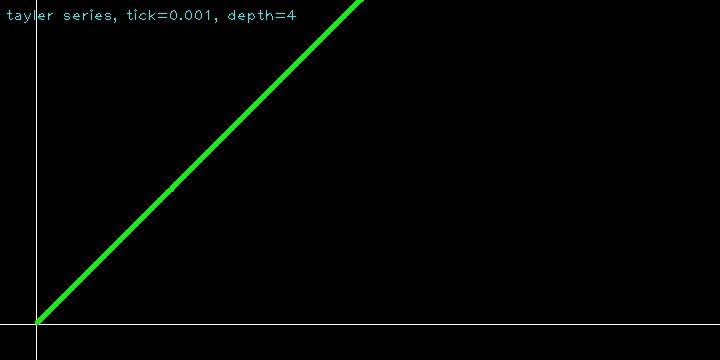

done 0.016002893447875977


In [280]:
if __name__ == "__main__":
    #physics
    dot = np.array([0,0], dtype=float)
    v0 = np.array([30,30], dtype=float)
    vector = np.array([30,30], dtype=float)
    gravity = np.array([0, -9.8], dtype=float)
    air_coe = 0.4
    #render
    count = 0
    tick = .005
    viewport = (-5, 45, 95, -5)
    frame = np.zeros((360, 720, 3), dtype=np.uint8)
    #draw axis
    cv2.putText(frame, "tayler series, tick=0.001, depth=4", (5, 20), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,0), 1)
    cv2.line(frame, getPx(frame, (0,-111110), viewport), getPx(frame, (0,111110), viewport), (255,255,255))
    cv2.line(frame, getPx(frame, (-10000,0), viewport), getPx(frame, (10000,0), viewport), (255,255,255))
    start = time.time()
    while True:
        #update
        time_delta = tick
        preDot = np.copy(dot)
        dot += (vector) * time_delta
        c = -air_coe
#       Euler Method
#         vector += (gravity + c * vector) * time_delta
#         x = tick*count
#         vector += ( (1/c)*(gravity+c*v0)*(c*e**(c*x)) ) * time_delta
#       Tailer Series
#         t1 = time_delta*(gravity + c * vector)
#         vector += t1 \
#                 + 0.5 * (time_delta) * c * t1 \
#                 + 1/6 * (time_delta**3) * (c * (c * ((gravity + c * vector)))) \
#                 + 1/24 * (time_delta**4) * (c * (c * (c * ((gravity + c * vector)))))
#         vector += 
#       Integral
#         x = tick * count
#         vector = (1/c)*(gravity+c*v0)*(np.e**(c*tick*count)-1)+v0
#         print('vp0', vp0,'k1', k1,'k2', k2,'x', x,'vx', vx, (1./c),e**(c*x + k1))
        count += 1
#         print(dot[1], preDot[1], dot[1] < 0 and preDot[1] > 0)
        if dot[1] < 0 and preDot[1] > 0:
            pt = getPx(frame, dot, viewport)
            val = dot[0]
            if abs(preDot[1]) < abs(dot[1]):
                val = preDot[0]
            cv2.putText(frame, 'x='+str(val), (pt[0]+5, pt[1]-17), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,0), 2)
            cv2.putText(frame, 't='+str(tick*count), (pt[0]+5, pt[1]-5), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,0), 2)
        #render
        frame = render(frame, dot, viewport = viewport)
        #exit
        if dot[0] > viewport[2] or dot[1] < viewport[3]:
            display.imshow(frame, maxSize=(111111,111111), compressPercent=0.98)
            print('done', time.time()-start)
            break

In [176]:
np.exp(2)

7.38905609893065

In [272]:
x = 0.0001
e = np.e
print(e,(e**(1-np.sin(x))-e**(1-np.tan(x)))/(np.tan(x)-np.sin(x)))

2.718281828459045 2.7178259751422797
